In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from statistics import mean 
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import stattools
from statsmodels.tsa.api import VAR
import seaborn as sns
from scipy import stats
from sklearn import linear_model
import os
from statsmodels.tsa.stattools import adfuller
import statsmodels as sm
from sklearn.metrics import roc_curve, confusion_matrix
from arch import arch_model
from scipy.stats import binom_test
from sklearn.linear_model import LogisticRegression

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "__init__.pxd", line 942, in numpy.import_array
RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\VS code\python\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\aaa\AppData\Local\Temp\ipykernel_9240\1369683806.py", line 6, in <module>
    import statsmodels.api as sm
  File "C:\VS code\python\lib\site-packages\statsmodels\api.py", line 125, in <module>
    from .graphics import api as graphics
  File "C:\VS code\python\lib\site-packages\statsmodels\graphics\api.py", line 9, in <m

In [2]:
file_path="C:/Users/aaa/Desktop/dss"

In [25]:
df = pd.read_csv("train&valid_yX_after_process.csv", sep=",")

In [26]:
df=df.astype({'Dates': 'datetime64[ns]'})

In [27]:

df = df.drop("Unnamed: 0", axis=1)
df = df.drop("Index2", axis=1)
df = df.replace([np.inf, -np.inf], np.nan)


In [28]:
df

,Dates,Year,Month,Day,DayOfWeek,AgeInDays,Holiday,dec_rate,signal,ESIndex,...,NAPMNIMPIndex,NHSPSTOTIndex,NHSPATOTIndex,ETSLTOTLIndex,NHSLTOTIndex,OUTFGAFIndex,EMPRGBCIIndex,CHPMINDXIndex,CONCCONFIndex,CONSSENTIndex
0,1999-04-01,1999,4,1,3,0,1,-0.004176,0,0.007346,...,52.7,1799,1720,5.10,881,10.4,NaN,57.0,133.9,105.7
1,1999-04-02,1999,4,2,4,1,0,0.000000,0,0.000000,...,52.7,1799,1720,5.10,881,10.4,NaN,57.0,133.9,105.7
2,1999-04-05,1999,4,5,0,2,0,0.000000,0,0.023604,...,55.3,1799,1720,5.10,881,10.4,NaN,57.0,133.9,105.7
3,1999-04-06,1999,4,6,1,3,0,0.000000,0,-0.002250,...,55.3,1799,1720,5.10,881,10.4,NaN,57.0,133.9,105.7
4,1999-04-07,1999,4,7,2,4,0,0.000000,0,0.006013,...,55.3,1799,1720,5.10,881,10.4,NaN,57.0,133.9,105.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6122,2022-09-19,2022,9,19,0,1490,0,-0.030041,1,0.007005,...,48.2,1446,1674,4.81,511,-9.9,-1.5,52.2,103.2,58.2
6123,2022-09-20,2022,9,20,1,1491,0,-0.030041,1,-0.011360,...,48.2,1575,1517,4.81,511,-9.9,-1.5,52.2,103.2,58.2
6124,2022-09-21,2022,9,21,2,1492,0,-0.030041,1,-0.017171,...,48.2,1575,1517,4.80,511,-9.9,-1.5,52.2,103.2,58.2
6125,2022-09-22,2022,9,22,3,1493,0,-0.030041,1,-0.008998,...,48.2,1575,1517,4.80,511,-9.9,-1.5,52.2,103.2,58.2


In [29]:
begin_date = pd.to_datetime("1999-04-01")
last_date = pd.to_datetime("2016-12-30")
#test_date = pd.to_datetime("2017-01-01")

-0.10254391759325931
0.00488304369491711


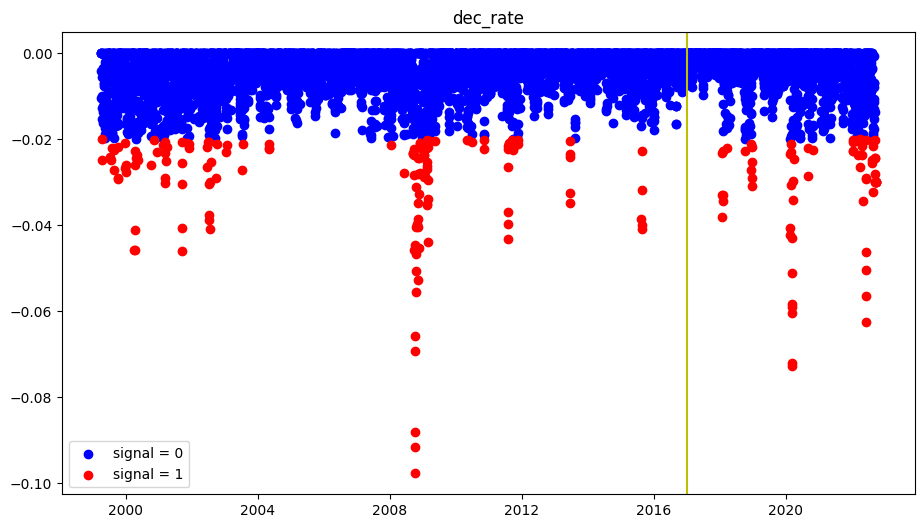

In [31]:
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(111)

#plt.plot(df["Dates"], df["dec_rate"], label="dec_rate")
plt.scatter(df.query("signal == 0")["Dates"], df.query("signal == 0")["dec_rate"], color="b", label="signal = 0")
plt.scatter(df.query("signal == 1")["Dates"], df.query("signal == 1")["dec_rate"], color="r", label="signal = 1")
plt.title("dec_rate")
ylim = ax.get_ylim()
print(ylim[0])
print(ylim[1])
ax.axvline(x=test_date, ymin=0, ymax=1, color="y")
plt.legend()
#plt.savefig(directory + "plot.png")
#plt.ylim(-1, 21)
plt.show()

In [32]:
import pandas as pd
import seaborn as sns

C:\Users\aaa\AppData\Local\Temp\ipykernel_9240\2380579405.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<AxesSubplot:>

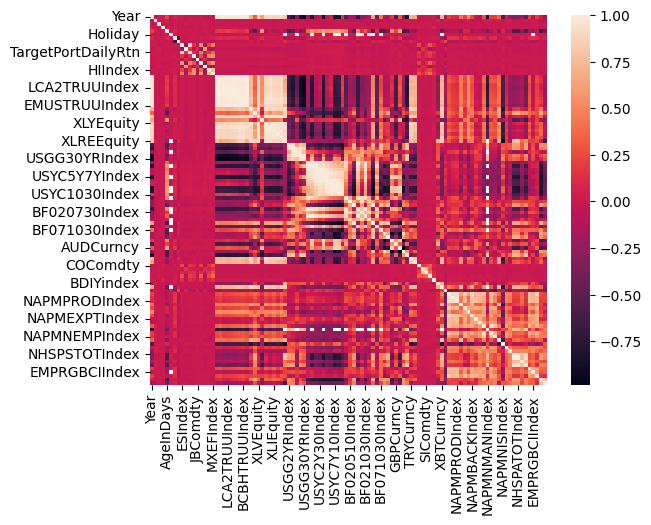

In [33]:
cor = df.corr()
sns.heatmap(cor)